In [1]:
%matplotlib inline
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
import seaborn as sns

# imports from sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

import chardet
data = r"StateOfIllinoisMBE_2016_2021_data.csv"

with open(data, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [2]:
# Read our CityofChicago data into pandas
data = r"C:\Users\Gisela Gutierrez\Project-3-MBE\StateOfIllinoisMBE_2016_2021_data.csv"

State_df = pd.read_csv(data, encoding = 'Windows-1252')
State_df.head()

,Business Name,Phone,Fax,Email,Address 1,Address 2,Address 3,City,State/Province,Zip Code/Postcode,...,Commodity/Work Codes,Commodity Codes/Work Codes with Descriptions,Primary Commodity/Work Codes,Primary Commodity/Work Codes with Descriptions,Other Commodity/Work Codes,Other Commodity/Work Codes with Descriptions,Certification Officer/Analyst,Region,Reciprocal Certification Agency,System Certification ID
0,"#9 Design, LLC",630-279-9990,630-279-9991,dulcinea@number-nine.com,28 East Saint Charles Road,NaN,NaN,Villa Park,IL,\t60181,...,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",NaN,NaN,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Claudia Gomez,Metro Chicago,WBDC,2617179
1,"#9 Design, LLC",630-279-9990,630-279-9991,dulcinea@number-nine.com,28 East Saint Charles Road,NaN,NaN,Villa Park,IL,\t60181,...,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",NaN,NaN,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Diane Colletti,Metro Chicago,WBDC,1908877
2,"#9 Design, LLC",630-279-9990,630-279-9991,dulcinea@number-nine.com,135 South Palmer Drive,Suite 200,NaN,Elmhurst,IL,\t60126,...,"90607, 90738","90607 - Architect Services, Professional, (Not...",NaN,NaN,"90607, 90738","90607 - Architect Services, Professional, (Not...",Vinram WadeBey,Metro Chicago,WBDC,781323
3,"#9 Design, LLC",630-279-9990,630-279-9991,dulcinea@number-nine.com,28 East Saint Charles Road,NaN,NaN,Villa Park,IL,\t60181,...,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",NaN,NaN,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Tamara Bell,Metro Chicago,WBDC,956123
4,"#9 Design, LLC",630-279-9990,630-279-9991,dulcinea@number-nine.com,28 East Saint Charles Road,NaN,NaN,Villa Park,IL,\t60181,...,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",NaN,NaN,90600,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Tamara Bell,Metro Chicago,WBDC,1121074


##  Data clean-up 

In [3]:
#Dropping the redundant features
State_df2 = State_df.drop(['Phone', 'Fax','Email','Address 1',
                           'Address 2','Address 3','Commodity/Work Codes',
                           'Primary Commodity/Work Codes','Website',
                           'Unique Entity Identifier','Commodity/Work Codes',
                           'Primary Commodity/Work Codes','Primary Commodity/Work Codes with Descriptions',
                           'Other Commodity/Work Codes','Certification Officer/Analyst',
                           'B2Gnow Vendor Number', 'System Certification ID'], axis = 1)

# writing  the dataframe to another csv file 
State_df2.to_csv('StateOfIllinoisCleanData.csv', index = False)

print("csv created")

csv created


In [4]:
State_df2.head()

,Business Name,City,State/Province,Zip Code/Postcode,Business Description,County,Certifying Agency,Certifying Agency (Short Version),Certification Type,Certification Action,Certification Status,Certification Date,Renewal Date,Expiration Date,Ethnicity,Gender,Commodity Codes/Work Codes with Descriptions,Other Commodity/Work Codes with Descriptions,Region,Reciprocal Certification Agency
0,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Active,12/21/2020,12/21/2021,12/21/2021,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
1,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Past/Inactive,12/11/2018,12/11/2019,12/11/2019,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
2,"#9 Design, LLC",Elmhurst,IL,\t60126,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,5/23/2016,5/23/2017,5/23/2017,Caucasian,Female,"90607 - Architect Services, Professional, (Not...","90607 - Architect Services, Professional, (Not...",Metro Chicago,WBDC
3,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,3/10/2017,3/10/2018,3/10/2018,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
4,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,2/27/2018,2/27/2019,2/27/2019,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC


In [5]:
#Rename Columns
State_df2.rename(columns={"Business Name":"Business_Name","Zip Code/Postcode":"Zip_Code/Postcode",
                          "Business Description":"Business_Description","Certifying Agency":"Certifying_Agency",
                          "Certifying Agency (Short Version)":"Certifying_Agency_(Short Version)",
                          "Certification Type":"Certification_Type","Certification Action":"Certification_Action",
                          "Certification Status":"Certification_Status","Certification Date":"Certification_Date",
                          "Renewal Date":"Renewal_Date","Expiration Date":"Expiration_Date",
                          "Commodity Codes/Work Codes with Descriptions":"Commodity_Codes/Work_Codes_with_Descriptions",
                          "Other Commodity/Work Codes with Descriptions":"Other_Commodity/Work_Codes_with_Descriptions",
                          "Reciprocal Certification Agency":"Reciprocal_Certification_Agency"},inplace=True)



# writing  the dataframe to another csv file 
State_df2.to_csv('StateOfIllinoisCleanData2.csv', index = False)

print("csv created")

csv created


In [6]:
State_df2.head()

,Business_Name,City,State/Province,Zip_Code/Postcode,Business_Description,County,Certifying_Agency,Certifying_Agency_(Short Version),Certification_Type,Certification_Action,Certification_Status,Certification_Date,Renewal_Date,Expiration_Date,Ethnicity,Gender,Commodity_Codes/Work_Codes_with_Descriptions,Other_Commodity/Work_Codes_with_Descriptions,Region,Reciprocal_Certification_Agency
0,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Active,12/21/2020,12/21/2021,12/21/2021,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
1,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Past/Inactive,12/11/2018,12/11/2019,12/11/2019,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
2,"#9 Design, LLC",Elmhurst,IL,\t60126,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,5/23/2016,5/23/2017,5/23/2017,Caucasian,Female,"90607 - Architect Services, Professional, (Not...","90607 - Architect Services, Professional, (Not...",Metro Chicago,WBDC
3,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,3/10/2017,3/10/2018,3/10/2018,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
4,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Deactivated,2/27/2018,2/27/2019,2/27/2019,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC


In [7]:
# Filter all rows for by Certification_Status and drop App. Closed, Denied, Past/Inactive, pending, Withdrawn  
df_filtered = State_df2[(State_df2.Certification_Status != 'App. Closed')
                        & (State_df2.Certification_Status != 'Denied')
                        & (State_df2.Certification_Status != 'Deactivated') 
                        & (State_df2.Certification_Status !='Decertified')
                        & (State_df2.Certification_Status != 'Past/Inactive') 
                        & (State_df2.Certification_Status != 'Pending')
                        & (State_df2.Certification_Status != 'Withdrawn')]

# writing  the dataframe to another csv file 
df_filtered.to_csv('StateOfIllinoisCleanData3.csv', index = False)

print("csv created")

df_filtered.head()


csv created


,Business_Name,City,State/Province,Zip_Code/Postcode,Business_Description,County,Certifying_Agency,Certifying_Agency_(Short Version),Certification_Type,Certification_Action,Certification_Status,Certification_Date,Renewal_Date,Expiration_Date,Ethnicity,Gender,Commodity_Codes/Work_Codes_with_Descriptions,Other_Commodity/Work_Codes_with_Descriptions,Region,Reciprocal_Certification_Agency
0,"#9 Design, LLC",Villa Park,IL,\t60181,"90607 Architect Services, Professional, (Not O...",DuPage,State of Illinois Central Management Services,CMS,WBE,Reciprocal,Active,12/21/2020,12/21/2021,12/21/2021,Caucasian,Female,"90600 - ARCHITECTURAL SERVICES, PROFESSIONAL","90600 - ARCHITECTURAL SERVICES, PROFESSIONAL",Metro Chicago,WBDC
6,"*PRADO & RENTERIA CPAS, Prof. Corp.",Chicago,IL,\t60616,CERTIFIED PUBLIC ACCOUNTANT (CPA) SERVICES,Cook,State of Illinois Central Management Services,CMS,WMBE,No Change Affidavit,Active,9/26/2018,9/26/2021,9/26/2025,Hispanic,Female,91870 - Inventory Consulting; 91875 - Manageme...,91870 - Inventory Consulting; 91875 - Manageme...,Metro Chicago,NaN
8,.VIZ CONSULTING CORPORATION,CHICAGO,IL,\t60647,Active NIGP 94600 FINANCIAL SERVICES ; ; A...,Cook,State of Illinois Central Management Services,CMS,WMBE,No Change Affidavit,Active,4/13/2017,4/13/2021,4/13/2024,Hispanic,Female,94600 - FINANCIAL SERVICES; 95352 - Insurance ...,94600 - FINANCIAL SERVICES; 95352 - Insurance ...,Metro Chicago,NaN
11,1776 American Valor Medical Supplies Inc.,willlowbrook,IL,\t60527,"46500\tHOSPITAL AND SURGICAL EQUIPMENT, INSTRU...",Cook,State of Illinois Central Management Services,CMS,VOSB,New,Active,4/17/2020,4/17/2021,4/17/2025,Asian American,Male,"46500 - HOSPITAL AND SURGICAL EQUIPMENT, INSTR...","46500 - HOSPITAL AND SURGICAL EQUIPMENT, INSTR...",Metro Chicago,NaN
13,"1st Call Technical Services, Inc",BOLINGBROOK,IL,\t60440,NIGP\t92033\tMapping and Geographical Informat...,Will,State of Illinois Central Management Services,CMS,VOSB,New,Active,4/21/2020,4/21/2021,4/21/2025,Caucasian,Male,92033 - Mapping and Geographical Information S...,92033 - Mapping and Geographical Information S...,Metro Chicago,NaN


In [8]:
# Find out the types of all columns in the dataframe 
df_filtered.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 14450
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Business_Name                                 3387 non-null   object
 1   City                                          3387 non-null   object
 2   State/Province                                3387 non-null   object
 3   Zip_Code/Postcode                             3387 non-null   object
 4   Business_Description                          3386 non-null   object
 5   County                                        3296 non-null   object
 6   Certifying_Agency                             3387 non-null   object
 7   Certifying_Agency_(Short Version)             3387 non-null   object
 8   Certification_Type                            3387 non-null   object
 9   Certification_Action                          3387 non-null   object
 10 

In [9]:
df_filtered.shape

(3387, 20)

In [10]:
df_filtered.isnull().any()

Business_Name                                   False
City                                            False
State/Province                                  False
Zip_Code/Postcode                               False
Business_Description                             True
County                                           True
Certifying_Agency                               False
Certifying_Agency_(Short Version)               False
Certification_Type                              False
Certification_Action                            False
Certification_Status                            False
Certification_Date                              False
Renewal_Date                                    False
Expiration_Date                                 False
Ethnicity                                       False
Gender                                          False
Commodity_Codes/Work_Codes_with_Descriptions     True
Other_Commodity/Work_Codes_with_Descriptions     True
Region                      

In [11]:
df_filtered = df_filtered.fillna(0)

In [12]:
# df_filtered.isnull().any()

In [13]:
# df_filtered.count()

## One-Hot Encoding

In [14]:
# sample taken from: https://www.ritchieng.com/machine-learning-linear-regression/

# create a Python list of feature names
feature_cols = ['Ethnicity','Gender']

# use the list to select a subset of the original DataFrame
X = df_filtered[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
#    X = data[['Ethnicity', 'Gender']]

# print the first 5 rows
X.head()


,Ethnicity,Gender
0,Caucasian,Female
6,Hispanic,Female
8,Hispanic,Female
11,Asian American,Male
13,Caucasian,Male


In [15]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3387, 2)


In [16]:
# view columns using df.columns
X.columns

Index(['Ethnicity', 'Gender'], dtype='object')

In [54]:
# TODO: create a LabelEncoder object and fit it to each feature in X

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,Ethnicity,Gender
0,3,0
6,4,0
8,4,0
11,2,1
13,3,1


In [18]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(3387, 8)

In [19]:
onehotlabels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [20]:
type(onehotlabels)

numpy.ndarray

In [21]:
# select a Series from the DataFrame
y = df_filtered['Certification_Type']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#  y = df_filtered.Certification_Type

# print the first 5 values
y.head()

0      WBE
6     WMBE
8     WMBE
11    VOSB
13    VOSB
Name: Certification_Type, dtype: object

In [22]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3387,)


In [23]:
print(df_filtered['Certification_Type'].unique())

['WBE' 'WMBE' 'VOSB' 'MBE' 'SDVOSB' 'PBE']


In [24]:
print(df_filtered.groupby('Certification_Type').size())

Certification_Type
MBE       1354
PBE         26
SDVOSB      83
VOSB       137
WBE       1036
WMBE       751
dtype: int64


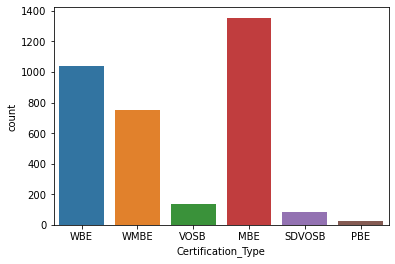

In [25]:
# Use seaborn to plot graph
sns.countplot(df_filtered['Certification_Type'],label="Count")
plt.show()

## Sklearn Model 

In [26]:
# import  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=0)

In [27]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2540, 2)
(847, 2)
(2540,)
(847,)


## Build Models
### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.87


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.92
Accuracy of Decision Tree classifier on test set: 0.92


### K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.92


### Linear Discriminant Analysis

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.82
Accuracy of LDA classifier on test set: 0.84


### Gaussian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.90
Accuracy of GNB classifier on test set: 0.91


### Support Vector Machine

In [41]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.92


In [42]:
# Calculate classification report

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[320   0   0   0   6  10]
 [  1   0   0   6   1   0]
 [  5   0   0   8   1   1]
 [  8   0   0  18   1   4]
 [  0   0   0   0 269   7]
 [  3   0   0   0   4 174]]
              precision    recall  f1-score   support

         MBE       0.95      0.95      0.95       336
         PBE       0.00      0.00      0.00         8
      SDVOSB       0.00      0.00      0.00        15
        VOSB       0.56      0.58      0.57        31
         WBE       0.95      0.97      0.96       276
        WMBE       0.89      0.96      0.92       181

    accuracy                           0.92       847
   macro avg       0.56      0.58      0.57       847
weighted avg       0.90      0.92      0.91       847



C:\Users\Gisela Gutierrez\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gisela Gutierrez\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gisela Gutierrez\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = df_filtered[['Ethnicity', 'Gender']]
y = df_filtered['Certification_Type']
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=0)

n_neighbors = 5

def plot_df_filtered_knn(X, y, n_neighbors):
    X_mat = np.array(X[['Ethnicity', 'Gender']])
    y_mat = np.array(y)
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF','#6D6R64'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#7D7D7d','#6D6R64'])

    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y,
                cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Category_Types = 'WBE' 'WMBE' 'VOSB' 'MBE' 'SDVOSB' 'PBE'

    patch0 = mpatches.Patch(color='#FF0000', label='WBE')
    patch1 = mpatches.Patch(color='#FFAAAA', label='WMBE')
    patch2 = mpatches.Patch(color='#AAFFAA', label='VOSB')
    patch3 = mpatches.Patch(color='#00FF00', label='MBE')
    patch4 = mpatches.Patch(color='##6d6e64', label='SDVOSB')
    patch5 = mpatches.Patch(color='#AFAFAF', label='PBE')
    plt.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5])

    plt.xlabel('Gender')
    plt.ylabel('Ethnicity')
    plt.title("4-Class classification (k = %i, weights = '%s')"
               % (n_neighbors, weights))    
    plt.show()



In [65]:
plot_df_filtered_knn(X_train, y_train,5)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 10378    WMBE
9516     WMBE
3817      MBE
3306     WMBE
1466      MBE
         ... 
3560     WMBE
13907     MBE
7021      MBE
11128     MBE
11665     MBE
Name: Certification_Type, Length: 2540, dtype: object

TypeError: iteration over a 0-d array

<Figure size 432x288 with 1 Axes>